In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import pandas as pd

# Linda

In [117]:
lindaf = "-lindalight-1-4f131251"
billf = "-billlight-1-4167bf22"

#lindaf = "-lindalight-1-b9611c0a"
#billf = "-billlight-1-ac455228"

#lindaf = "-lindalight-1-17c7b3b1"
#billf = "-billlight-1-33941a11"

linda_data = json.load(open(os.path.join("TRAININGS",lindaf,"data.json"),"r"))
bill_data = json.load(open(os.path.join("TRAININGS",billf,"data.json"),"r"))

In [118]:
def extract_info(datafull):
    data = []
    for qindex in datafull:
        question = datafull[qindex]['question']
        results = datafull[qindex]['list']['0']['sequence']['0']
        order = question['info']['order']
        mapping = [question['info'][k] for k in ['training 1','hobby 1','work 1','hobby 2']]
        pattern = [m[0] for m in mapping]
        vignettes = [m[1] for m in mapping]

        logprobs = results['answer']['choices'][0]['logprobs']['top_logprobs'][0]
        print(logprobs.keys())
        pa = 0
        pb = 0
        try:
            pa += np.exp(logprobs['1'])
        except:
            pass
        """try:
            pa += np.exp(logprobs[' 1'])
        except:
            pass"""
        try:
            pb += np.exp(logprobs['2'])
        except:
            pass
        """try:
            pb += np.exp(logprobs[' 2'])
        except:
            pass"""
        pc = [pb,pa][order]
        pi = [pa,pb][order]

        data.append({
            "order":'reverse' if order==0 else 'standard', #Order in which answers were proposed : 0- reversed  1- standard
            "mapping":mapping, #mapping of sets in which vignettes were taken
            "pa":pa, #prob for answering a
            "pb":pb, #probs for answering b
            "Prob Correct":pc, #probs for answering the rational answer
            "Prob Fallacy":pi #probs for answering the intuitive answer
        })
        assert 0<=pc<=1
        assert 0<=pi<=1
    return data

In [119]:
linda = extract_info(linda_data)
bill = extract_info(bill_data)
data = []
for d in linda:
    d['exp'] = 'linda'
    data.append(d)
for d in bill:
    d['exp'] = 'bill'
    data.append(d)
data = pd.DataFrame(data=data)

dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['This', 'A', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['This', 'A', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['This', 'A', 'a', 'b', 'c'])
dict_keys(['A', 'a', 'b', 'c', 'd'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['This', 'A', 'a', 'b', 'c'])
dict_keys(['1', 'A', 'a', 'b', 'c'])
dict_keys(['1', 'A', 'a', 'b', 'c'])
dict_keys(['A', 'a', 'b', 'c', 'd'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 'b', 'c'])
dict_keys(['A', 'B', 'a', 

<AxesSubplot:xlabel='exp', ylabel='Prob Correct'>

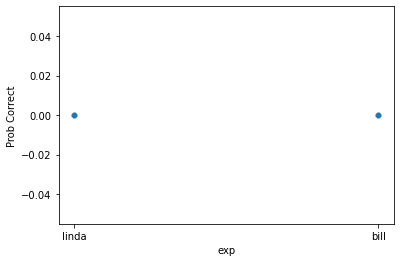

In [120]:
sns.scatterplot(data=data[data.order=='standard'],x='exp',y='Prob Correct',alpha=0.1)

<AxesSubplot:xlabel='exp', ylabel='Prob Correct'>

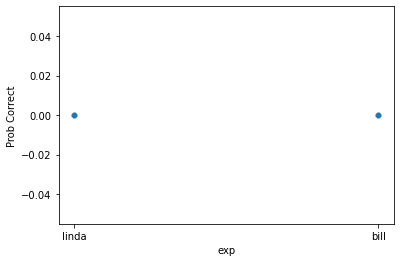

In [121]:
sns.scatterplot(data=data[data.order=='reverse'],x='exp',y='Prob Correct',alpha=0.1)

<AxesSubplot:xlabel='order', ylabel='Prob Correct'>

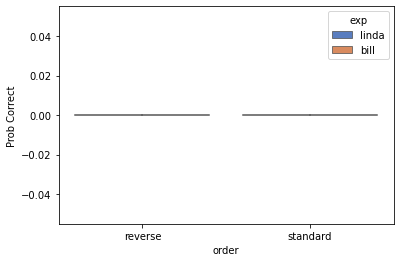

In [122]:
sns.violinplot(x='order',y='Prob Correct',hue='exp',data=data,palette='muted',split=True)

<AxesSubplot:xlabel='order', ylabel='Prob Fallacy'>

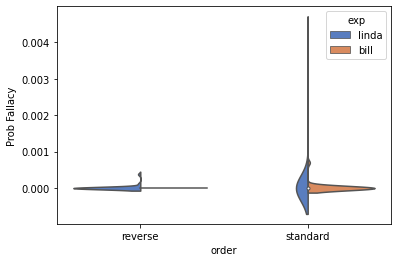

In [123]:
sns.violinplot(x='order',y='Prob Fallacy',hue='exp',data=data,palette='muted',split=True)

<AxesSubplot:title={'center':'Standard order'}, xlabel='exp', ylabel='Prob Fallacy'>

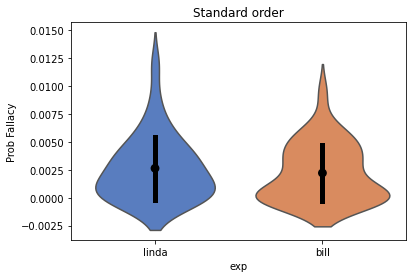

In [115]:
sns.violinplot(x='exp',y='Prob Fallacy',inner=None,data=data[data.order=='standard'],palette='muted').set(title='Standard order')
sns.pointplot(x ='exp', y='Prob Fallacy', data=data[data.order=='standard'],ci='sd',errwidth=5,linestyles='',color='black') 


<AxesSubplot:title={'center':'Reverse order'}, xlabel='exp', ylabel='Prob Fallacy'>

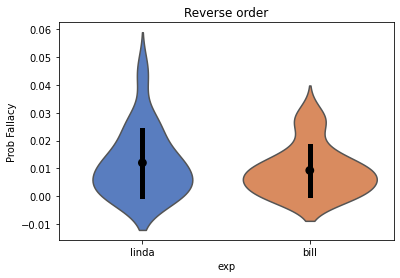

In [116]:
sns.violinplot(x='exp',y='Prob Fallacy',inner=None,data=data[data.order=='reverse'],palette='muted').set(title='Reverse order')
sns.pointplot(x ='exp', y='Prob Fallacy', data=data[data.order=='reverse'],ci='sd',errwidth=5,linestyles='',color='black') 

In [61]:
l = []
data = linda_data
for qindex in data:
    li = ''
    for k in ['training 1','hobby 1','work 1','hobby 2']:
        li += data[qindex]['question']['info'][k][0]
    l.append(li)
l = np.array(l)
np.unique(l,return_counts=True)

(array(['AASA', 'SSAS'], dtype='<U4'), array([512, 512]))

In [26]:
bill_input = json.load(open('billfull.json'))

l = []
data = bill_input
for qindex in data:
    li = ''
    for k in ['training 1','hobby 1','work 1','hobby 2']:
        li += data[qindex]['info'][k][0]
    l.append(li)
l = np.array(l)
np.unique(l,return_counts=True)

(array(['AAAS', 'SSSA'], dtype='<U4'), array([768, 256]))

In [42]:
bill_input = json.load(open('billfull.json'))

data = bill_input
for i in range(4):
    print('----')
    print(data[str(256*i)]['question'])
    for a in data[str(256*i)]['answers']:
        print('--',a)

----
Andie is a mechanical engineer by training. During college, Andie used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ?
-- Andie works for a known tech company and collects Victor Hugo 1st editions.
-- Andie works for a known tech company.
----
Andie is a ballet dancer by training. During college, Andie studied painting and sculpting for fun. Ten years later, which of these two scenarios is more probable ?
-- Andie is a consultant for the British Museum and builds model airplanes as a hobby.
-- Andie is a consultant for the British Museum.
----
Andie is a ballet dancer by training. During college, Andie studied painting and sculpting for fun. Ten years later, which of these two scenarios is more probable ?
-- Andie is a consultant for the British Museum.
-- Andie is a consultant for the British Museum and builds model airplanes as a hobby.
----
Andie is a ballet dancer by training. During college, Andie studied painting

In [94]:
bill_input = json.load(open('billfull.json'))
bill_correct = json.load(open('data/billcorrect.json'))
bill = json.load(open('bill.json'))
for i in range(256):
    bill_input[str(i+512)] = bill_correct[str(i)]


In [95]:
import combinator

In [96]:
comb = combinator.Combinator('data/to_combine/CF1.json',None,mode='bill')
comb.load()

In [97]:
l = []
for i in bill:
    q = bill_input[i]
    l.append( ([q['question'],*q['answers']],q['info']))
comb.test_generate_all(l)

--- Testing generated sequences ---
Count names : (array([64]), array([16]))
PASSED
Count vignettes : (array([128]), array([32]))
PASSED
Count patterns : (array(['AAAS', 'SSSA'], dtype='<U4'), array([512, 512]))
PASSED
Random generation :
------
River is a ballet dancer by training. During college, River loved to perform artistic photography, as a hobby. Ten years later, which of these two scenarios is more probable ?
--- River is an advisor to the Minister of Culture and builds model airplanes as a hobby.
--- River is an advisor to the Minister of Culture.
River is a ballet dancer by training. During college, River loved to perform artistic photography, as a hobby. Ten years later, which of these two scenarios is more probable ?
--- River is an advisor to the Minister of Culture.
--- River is an advisor to the Minister of Culture and builds model airplanes as a hobby.
------
Maxwell is an orchestra conductor by training. During college, Maxwell often spent week-ends in museums. Ten ye

In [50]:
json.dump(bill_input,open('bill.json','w'))

In [55]:
bill_old = json.load(open('TRAININGS/-billfull-1-69ed3825/data.json','r'))
bill_new = json.load(open('TRAININGS/-billcorrect-1-09653f8f/data.json','r'))

for i in range(256):
    bill_old[str(i+512)] = bill_new[str(i)]

In [67]:
for i in range(4):
    print('---')
    print(bill_old[str(i*256)]['question']['prompt'])
    for a in bill_old[str(i*256)]['question']['answers']:
        print('--',a)
    res = bill_old[str(i*256)]['list']['0']['sequence']['0']
    probs = res['answer']['choices'][0]['logprobs']['top_logprobs'][0]
    print(np.exp(probs['a']),np.exp(probs['b']))

---
Andie is a mechanical engineer by training. During college, Andie used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ?
-- Andie works for a known tech company and collects Victor Hugo 1st editions.
-- Andie works for a known tech company.
0.42529301523745666 0.5526727913277368
---
Andie is a ballet dancer by training. During college, Andie studied painting and sculpting for fun. Ten years later, which of these two scenarios is more probable ?
-- Andie is a consultant for the British Museum and builds model airplanes as a hobby.
-- Andie is a consultant for the British Museum.
0.5737138649901822 0.4062828041180116
---
Andie is a mechanical engineer by training. During college, Andie used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ?
-- Andie works for a known tech company.
-- Andie works for a known tech company and collects Victor Hugo 1st editions.
0.9293

In [100]:
for i in range(1024):
    if i<2:
        print(bill_old[str(i)]['question']['prompt'],bill[str(i)]['question'])
        print(bill_old[str(i)]['question']['answers'],bill[str(i)]['answers'])
    assert bill_old[str(i)]['question']['prompt'] == bill[str(i)]['question']
    assert bill_old[str(i)]['question']['answers'] == bill[str(i)]['answers']

Andie is a mechanical engineer by training. During college, Andie used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ? Andie is a mechanical engineer by training. During college, Andie used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ?
['Andie works for a known tech company and collects Victor Hugo 1st editions.', 'Andie works for a known tech company.'] ['Andie works for a known tech company and collects Victor Hugo 1st editions.', 'Andie works for a known tech company.']
Ari has a PhD in applied maths. During college, Ari used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ? Ari has a PhD in applied maths. During college, Ari used to collect minerals and cristals, as a hobby. Ten years later, which of these two scenarios is more probable ?
['Ari works for a known tech company and collects Victor H

In [92]:
bill[0]

{'order': 'reverse',
 'mapping': [['S', 'is a mechanical engineer by training'],
  ['S', 'used to collect minerals and cristals, as a hobby'],
  ['S', 'works for a known tech company'],
  ['A', 'collects Victor Hugo 1st editions']],
 'pa': 0.42529301523745666,
 'pb': 0.5526727913277368,
 'Prob Correct': 0.5526727913277368,
 'Prob Fallacy': 0.42529301523745666,
 'exp': 'bill'}

In [101]:
json.dump(bill_old,open('data.json','w'))

# Analysis qProbs

In [48]:
old_crt = json.load(open(os.path.join('TRAININGS','-old_crt-1-252e5b25','data.json')))
old_crt2 = json.load(open(os.path.join('TRAININGS','-old_crt2-1-517016e5','data.json')))
new_crt = json.load(open(os.path.join('TRAININGS','-new_crt-1-7e35794c','data.json')))

In [49]:
def get_data(data):
    data2 = []
    for qindex in data:
        answ = data[qindex]['list']['0']['sequence']['0']['answer']['choices'][0]['logprobs']
        data2.append((answ['tokens'],answ['token_logprobs']))
    return data2
data_old = get_data(old_crt)
data_old2 = get_data(old_crt2)
data_new = get_data(new_crt)

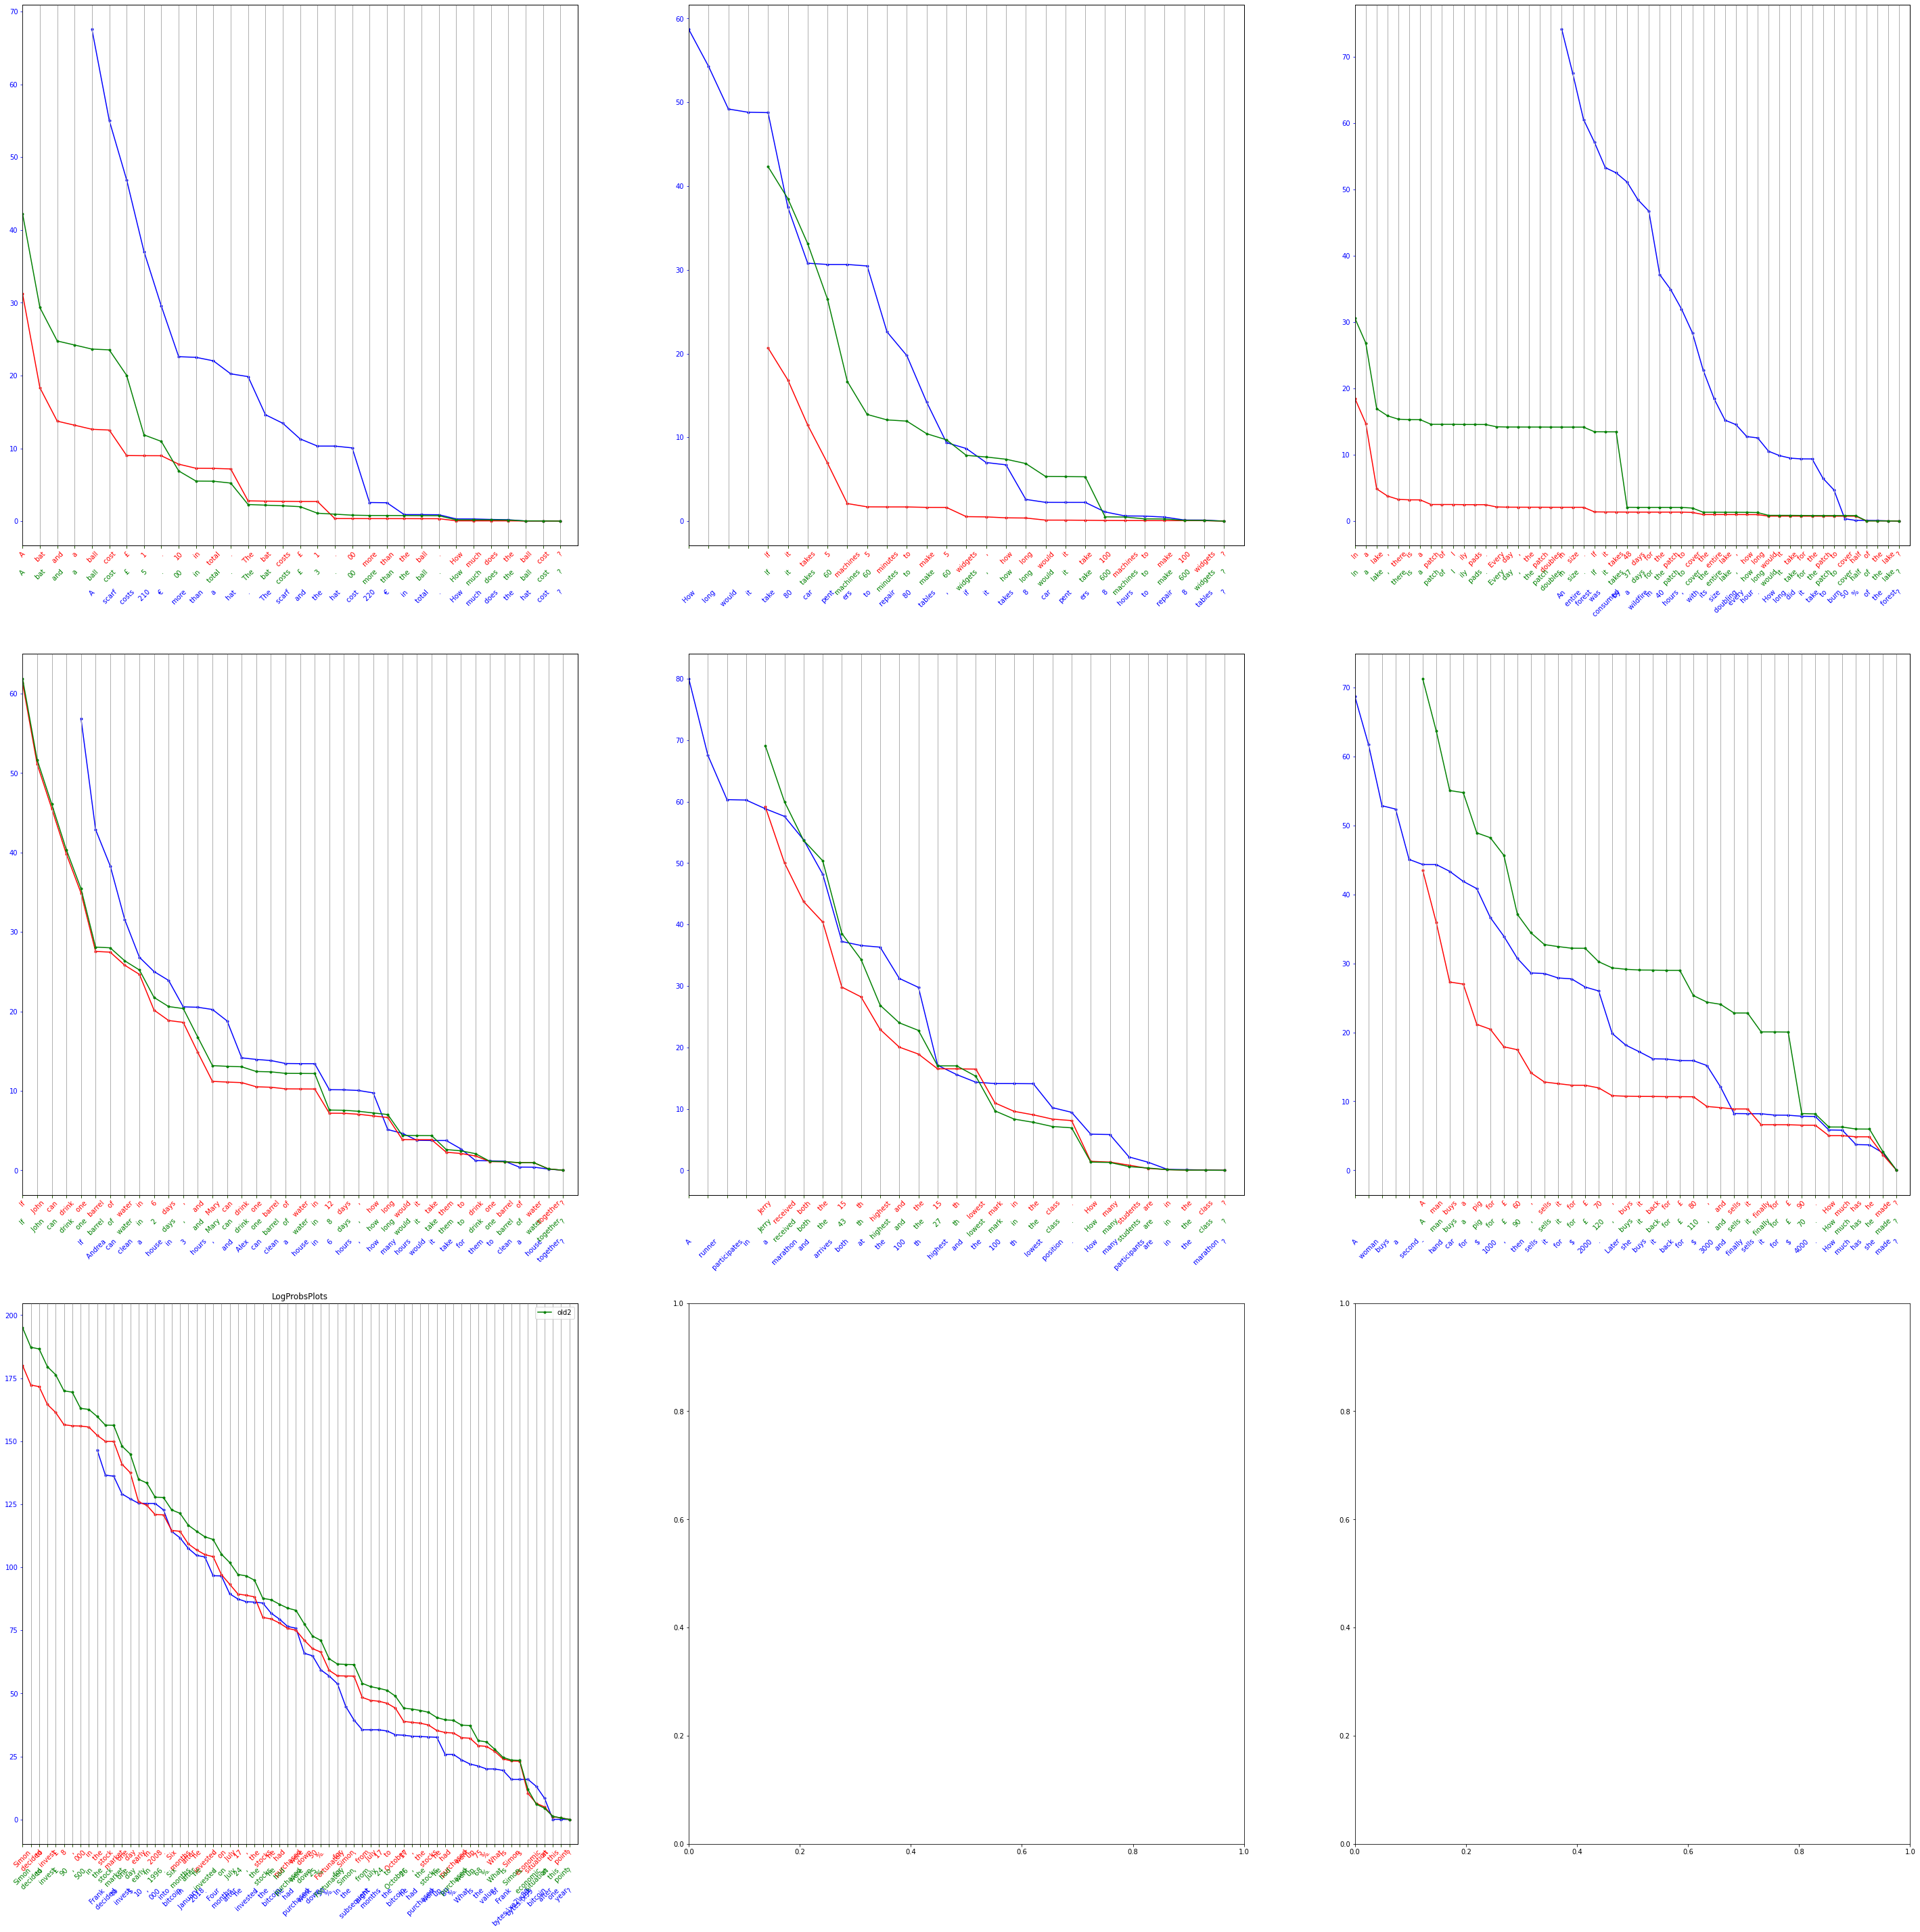

In [60]:
def compute_score(l,miss):
    l2 = [0]+l[1:]
    out = list(-np.flip(np.cumsum(np.flip(l2))))
    return out[1:]+[0]#+[0]*miss

n = len(data_old)
fig,ax = plt.subplots(int(n**0.5+1),int(n**0.5+1),figsize=(50,50))
for i in range(n):
    x,y = i//int(n**0.5+1),i%int(n**0.5+1)
    plt.subplot(int(n**0.5+1),int(n**0.5+1),i+1)
    
    maxlen = max(len(data_old[i][0]),len(data_new[i][0]))
    old_miss= maxlen-len(data_old[i][0])
    new_miss = maxlen-len(data_new[i][0])
    old2_miss = maxlen-len(data_old2[i][0])
    
    ax1 = ax[x][y]
    ax2 = ax[x][y].twiny()
    ax1,ax2 = ax2,ax1
    ax3 = ax1.twiny()
    
    ax1.plot(range(old_miss,maxlen),compute_score(data_old[i][1],old_miss),marker='.',color='red',label='old')#,drawstyle="steps-post")
    ax1.set_xticks(range(maxlen))
    ax1.set_xticklabels(old_miss*['']+data_old[i][0],rotation=45)
    ax1.set_xlim([0,maxlen])
    ax1.xaxis.grid(True)
    ax1.tick_params(colors='red',bottom=True)
    
    ax2.plot(range(new_miss,maxlen),compute_score(data_new[i][1],new_miss),marker='.',color='blue',label='new')
    ax2.set_xticks(range(maxlen))
    ax2.set_xticklabels(new_miss*['']+data_new[i][0],rotation=45)
    ax2.xaxis.grid(True)
    ax2.set_xlim([0,maxlen])
    ax2.tick_params(colors='blue',bottom=True)
    for t in ax2.xaxis.get_major_ticks():
        t.set_pad(60)
    
    ax3.plot(range(old2_miss,maxlen),compute_score(data_old2[i][1],old2_miss),marker='.',color='green',label='old2')
    ax3.set_xticks(range(maxlen))
    ax3.set_xticklabels(old2_miss*['']+data_old2[i][0],rotation=45)
    ax3.xaxis.grid(True)
    ax3.set_xlim([0,maxlen])
    ax3.tick_params(colors='green',bottom=True)
    ax3.xaxis.set_ticks_position('bottom')
    for t in ax3.xaxis.get_major_ticks():
        t.set_pad(30)
    
        
plt.title('LogProbsPlots')
plt.legend()
plt.show()